In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Loading / Cleaning a Trace

In [179]:
traces_folder = 'logging/batch-06-26_06:51:05'
trace = '0-0-raw'

In [135]:
def clean_trace(trace):
    df = pd.read_csv(trace, delimiter=' ', header=None)
    
    # Meaningful column names
    df.columns = ['Timestamp', 'Direction', 'dummy1', 'Circuit', 
                  'dummy2', 'Stream', 'dummy3', 'Command',
                  'dummy4', 'Length']

    # Drop unnecessary columns
    df.drop(['dummy1', 'dummy2', 'dummy3', 'dummy4'], axis=1, inplace=True)

    # Dump trash commas and fix data types
    df['Circuit'] = df['Circuit'].apply(lambda x: x.rstrip(',')).astype('int')
    df['Stream'] = df['Stream'].apply(lambda x: x.rstrip(',')).astype('int')
    df['Command'] = df['Command'].apply(lambda x: x.rstrip(','))
    return df

In [230]:
df['Timestamp']

0      1.466924e+09
1      1.466924e+09
2      1.466924e+09
3      1.466924e+09
4      1.466924e+09
5      1.466924e+09
6      1.466924e+09
7      1.466924e+09
8      1.466924e+09
9      1.466924e+09
10     1.466924e+09
11     1.466924e+09
12     1.466924e+09
13     1.466924e+09
14     1.466924e+09
15     1.466924e+09
16     1.466924e+09
17     1.466924e+09
18     1.466924e+09
19     1.466924e+09
20     1.466924e+09
21     1.466924e+09
22     1.466924e+09
23     1.466924e+09
24     1.466924e+09
25     1.466924e+09
26     1.466924e+09
27     1.466924e+09
28     1.466924e+09
29     1.466924e+09
           ...     
332    1.466924e+09
333    1.466924e+09
334    1.466924e+09
335    1.466924e+09
336    1.466924e+09
337    1.466924e+09
338    1.466924e+09
339    1.466924e+09
340    1.466924e+09
341    1.466924e+09
342    1.466924e+09
343    1.466924e+09
344    1.466924e+09
345    1.466924e+09
346    1.466924e+09
347    1.466924e+09
348    1.466924e+09
349    1.466924e+09
350    1.466924e+09


# Descriptive Statistics on a few traces

In [180]:
df_00raw = clean_trace('{}/{}'.format(traces_folder, '0-0-raw'))

In [175]:
def pretty_plot():
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    # Remove grid lines
    ax.grid(False)
    # Remove plot frame
    ax.set_frame_on(False)
    return ax


def generate_basic_plots(df):
    df['Direction'].value_counts().plot(kind='bar', ax=pretty_plot(), title='Cell directions')
    df['Circuit'].value_counts().plot(kind='barh', ax=pretty_plot(), title='Cells per Circuit')
    df['Stream'].value_counts().plot(kind='barh', ax=pretty_plot(), title='Cells per Stream')

    
def generate_basic_tables(df):
    print('[***] Most frequent lengths by count')
    print(df['Length'].value_counts())
    command_group = df.groupby(['Command', 'Length'])
    print('[***] Group length by command')
    print(command_group.count())

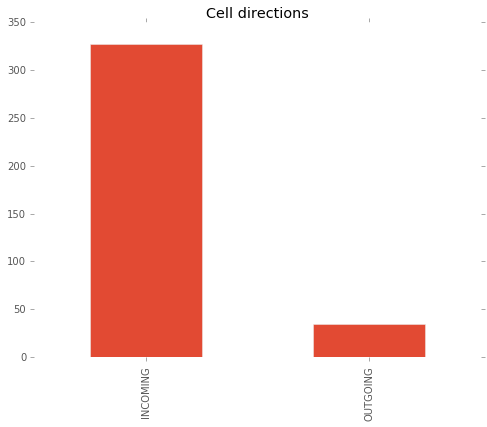

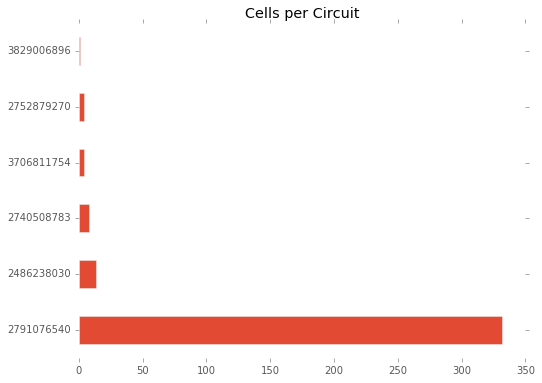

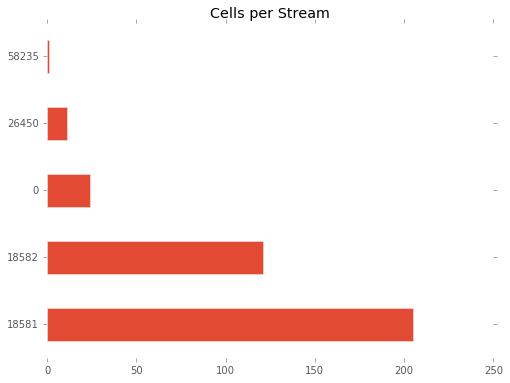

In [176]:
generate_basic_plots(df_00raw)

In [177]:
generate_basic_tables(df_00raw)

[***] Most frequent lengths by count
498    293
0       14
119      7
66       7
448      6
1        4
177      3
329      2
324      2
317      2
4        2
492      2
148      2
96       1
29       1
38       1
3        1
90       1
20       1
450      1
158      1
218      1
273      1
289      1
306      1
400      1
408      1
409      1
212      1
Name: Length, dtype: int64
[***] Group length by command
                                   Timestamp  Direction  Circuit  Stream
Command                    Length                                       
BEGIN(1)                   4               2          2        2       2
BEGIN_DIR(13)              0               1          1        1       1
CONNECTED(4)               0               3          3        3       3
DATA(2)                    3               1          1        1       1
                           29              1          1        1       1
                           38              1          1        1       1
   

Mapping between command and length not one to one. O SNAP

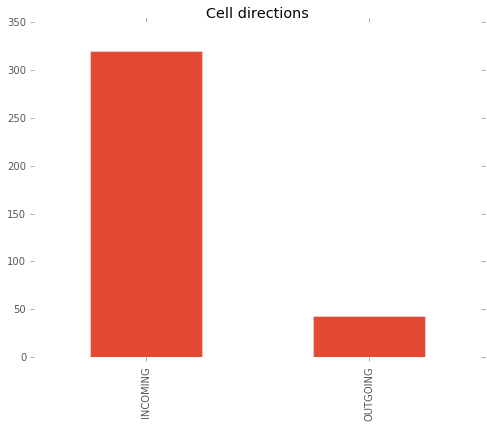

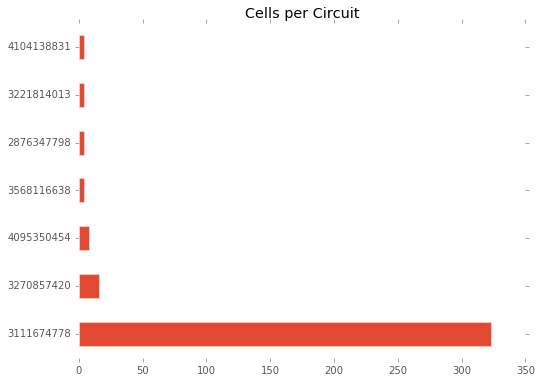

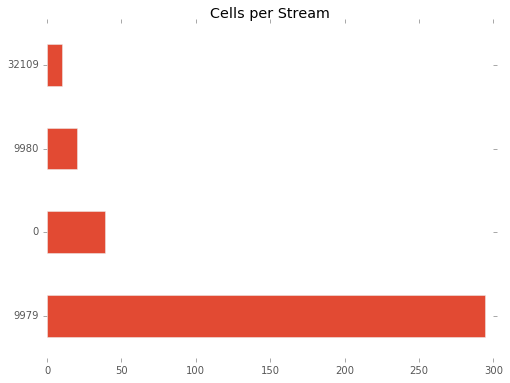

In [224]:
df_77raw = clean_trace('{}/{}'.format(traces_folder, '77-raw'))
generate_basic_plots(df_77raw)

In [183]:
generate_basic_tables(df_77raw)

[***] Most frequent lengths by count
498    289
119     15
66      15
0       13
448      7
4        2
148      2
437      1
170      1
1        1
20       1
51       1
460      1
89       1
111      1
212      1
400      1
251      1
462      1
290      1
300      1
305      1
315      1
345      1
351      1
393      1
289      1
Name: Length, dtype: int64
[***] Group length by command
                                   Timestamp  Direction  Circuit  Stream
Command                    Length                                       
BEGIN(1)                   4               2          2        2       2
BEGIN_DIR(13)              0               1          1        1       1
CONNECTED(4)               0               3          3        3       3
DATA(2)                    51              1          1        1       1
                           89              1          1        1       1
                           111             1          1        1       1
                         

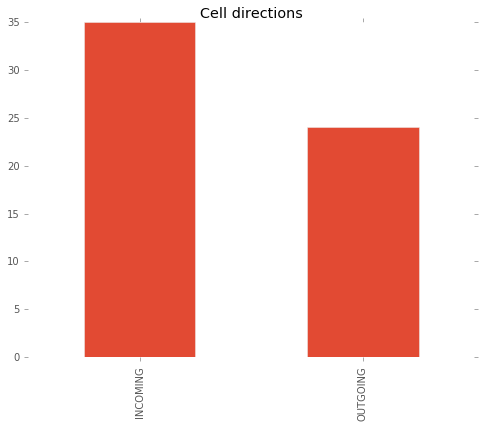

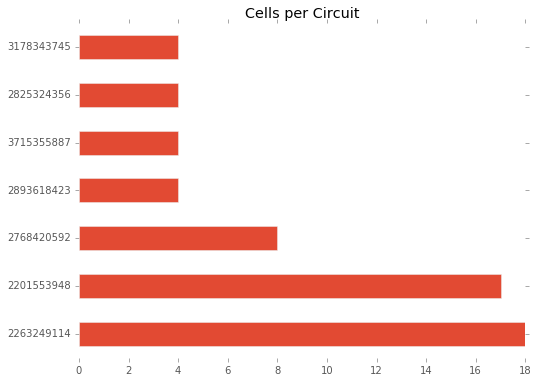

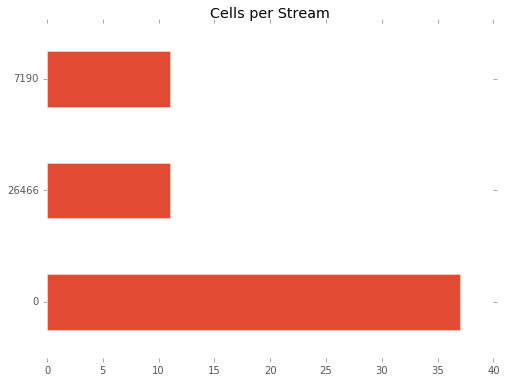

In [185]:
df_99raw = clean_trace('{}/{}'.format(traces_folder, '99-raw'))
generate_basic_plots(df_99raw)

In [186]:
generate_basic_tables(df_99raw)

[***] Most frequent lengths by count
66     15
119    15
498     9
0       5
324     2
148     2
449     1
4       1
1       1
20      1
270     1
212     1
281     1
90      1
289     1
300     1
400     1
Name: Length, dtype: int64
[***] Group length by command
                                   Timestamp  Direction  Circuit  Stream
Command                    Length                                       
BEGIN(1)                   4               1          1        1       1
BEGIN_DIR(13)              0               1          1        1       1
CONNECTED(4)               0               2          2        2       2
DATA(2)                    90              1          1        1       1
                           270             1          1        1       1
                           281             1          1        1       1
                           289             1          1        1       1
                           300             1          1        1       1
      

In [293]:
list(df_00raw.Command.unique())

['EXTEND2(14)',
 'EXTENDED2(15)',
 'BEGIN_DIR(13)',
 'DATA(2)',
 'CONNECTED(4)',
 'END(3)',
 'ESTABLISH_RENDEZVOUS(33)',
 'RENDEZVOUS_ESTABLISHED(39)',
 'EXTEND(6)',
 'EXTENDED(7)',
 'INTRODUCE1(34)',
 'INTRODUCE_ACK(40)',
 'RENDEZVOUS2(37)',
 'BEGIN(1)',
 'SENDME(5)']

In [289]:
import matplotlib.lines as mlines

shape_dict = {'EXTEND2(14)': 'o',
 'EXTENDED2(15)': 'd',
 'BEGIN_DIR(13)': 'D',
 'DATA(2)': 'H',
 'CONNECTED(4)': 's',
 'END(3)': 'v',
 'EXTEND(6)': 'o',
 'EXTENDED(7)': 'o',
 'ESTABLISH_RENDEZVOUS(33)': 'd',
 'RENDEZVOUS_ESTABLISHED(39)': 'D',
 'INTRODUCE1(34)': 'H',
 'INTRODUCE_ACK(40)': 's',
 'RENDEZVOUS2(37)': 'v',
 'BEGIN(1)': 'o',
 'SENDME(5)': 'o'}

color_dict = {'EXTEND2(14)': 'purple',
 'EXTENDED2(15)': 'gold',
 'BEGIN_DIR(13)': 'aqua',
 'DATA(2)': 'red',
 'CONNECTED(4)': 'lime',
 'END(3)': 'orange',
 'EXTEND(6)': 'pink',
 'EXTENDED(7)': 'gray',
 'ESTABLISH_RENDEZVOUS(33)': 'skyblue',
 'RENDEZVOUS_ESTABLISHED(39)': 'plum',
 'INTRODUCE1(34)': 'black',
 'INTRODUCE_ACK(40)': 'green',
 'RENDEZVOUS2(37)': 'yellow',
 'BEGIN(1)': 'brown',
 'SENDME(5)': 'green'}

def create_timeline_plot(timeline, color_dict, shape_dict, titlestr="", fig_height=16, fig_width=20, marker_size=150.0):
    # Extract the data for plotting.
    x_data      = timeline['Timestamp']
    y_data      = timeline['Length']
    type_data   = timeline['Command']

    # Get a list of unique types in the timeline data.
    unique_types = list( type_data.unique() )
    
    # Create a figure and time-axis.
    fig, ax = plt.subplots(figsize=(fig_width,fig_height))
    ax.hold(True)

    # For each event type, create a scatter plot.
    for event_type in unique_types:

        # Get the x and y values.i
        mask = timeline['Command'] == event_type
        data = timeline[mask]
        x_data = data['Timestamp']
        y_data = data['Length']

        # For light colors, make the edges darker.
        if color_dict[event_type] in ["yellow", "white", "pink"]:
            linewidth = 1.5
        else:
            linewidth = 0.0

        # Create the scatter plot.
        ax.scatter(x_data.values, y_data.values, label=event_type,
            marker=shape_dict[event_type], s=marker_size, c=color_dict[event_type], linewidths=linewidth)

    # Make the figure pretty.
    fig.autofmt_xdate()
    ax.yaxis.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_axis_bgcolor('whitesmoke')
    plt.xticks(rotation=80)
    plt.tick_params(labelsize=20)
    ax.legend(loc=2, numpoints=1, scatterpoints=1)

    # Remove grid lines
    ax.grid(False)
    # Remove plot frame
    ax.set_frame_on(False)
    # Set the title.
    plt.title(titlestr, fontsize=20)

    # Show the plot.
    plt.show()

    # Return the axis handle.
    return ax

# Entity Timelines

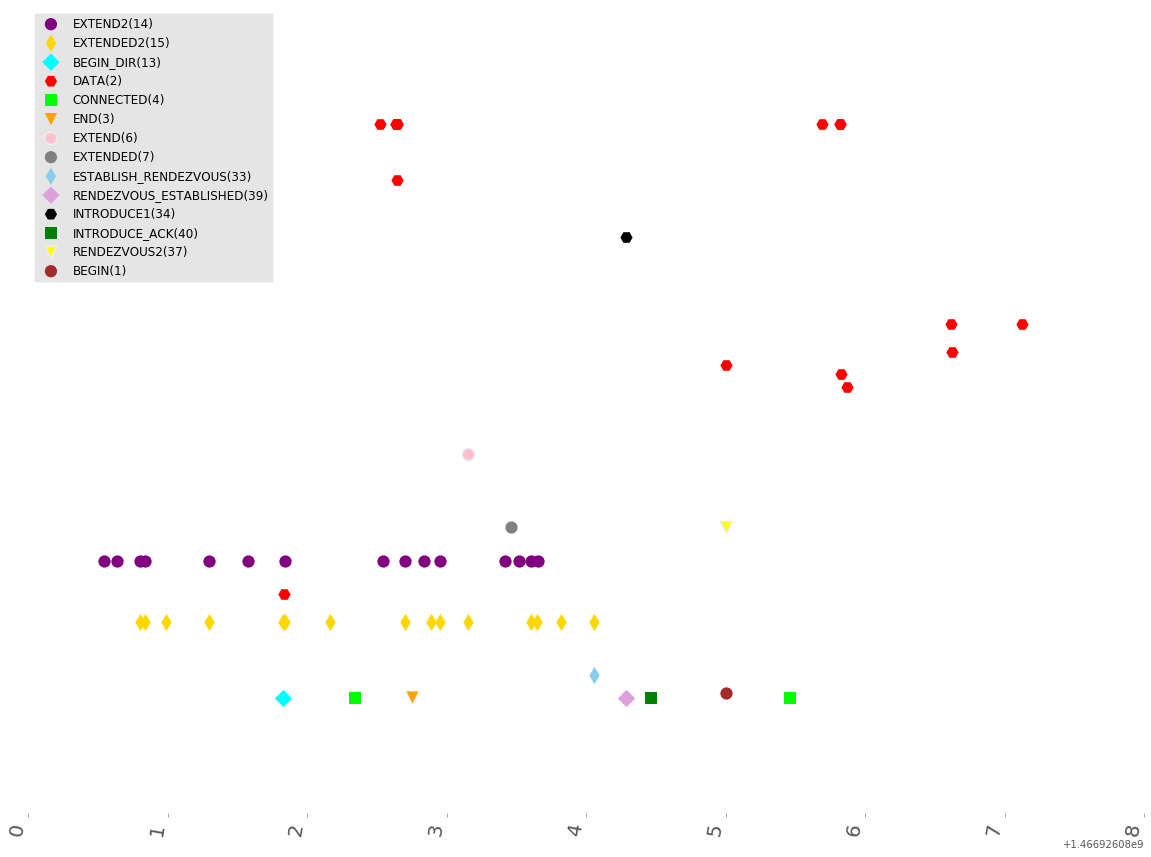

In [290]:
create_timeline_plot(df_99raw, color_dict, shape_dict)

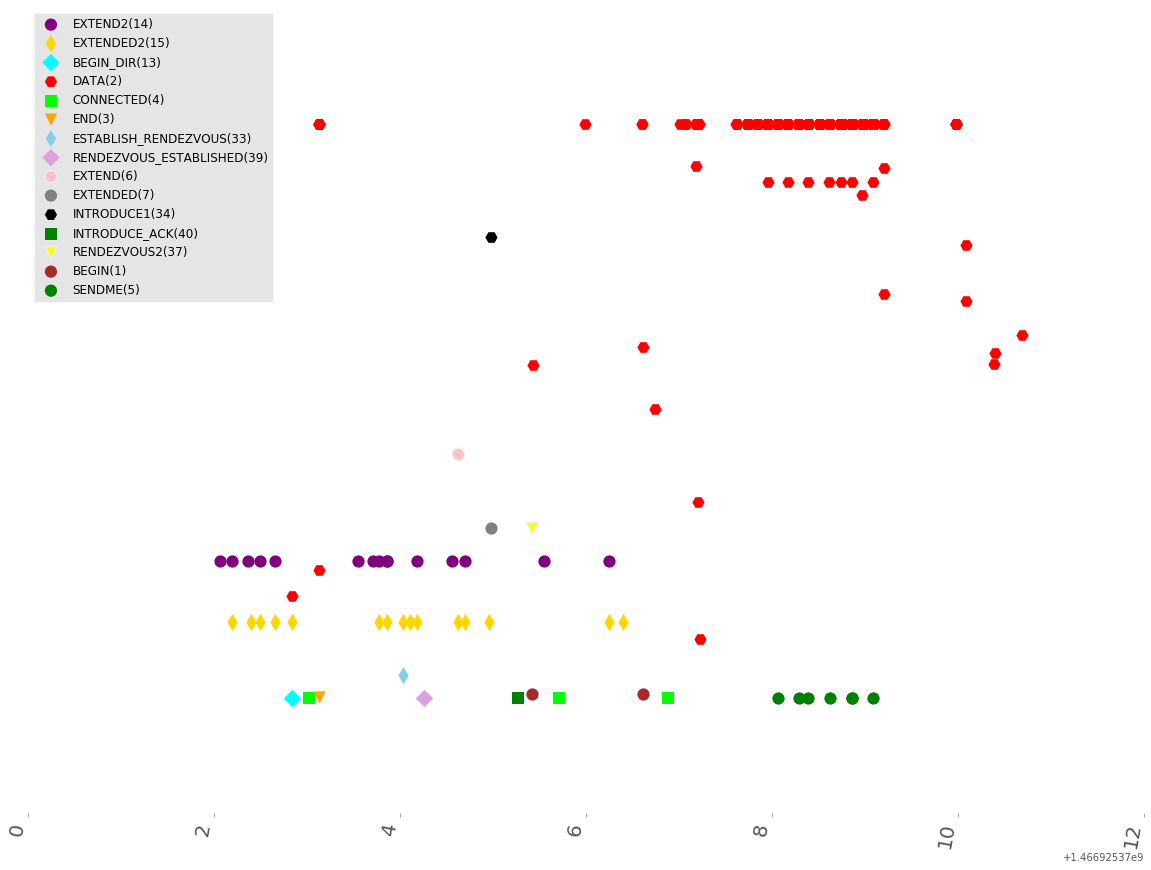

In [291]:
create_timeline_plot(df_77raw, color_dict, shape_dict)

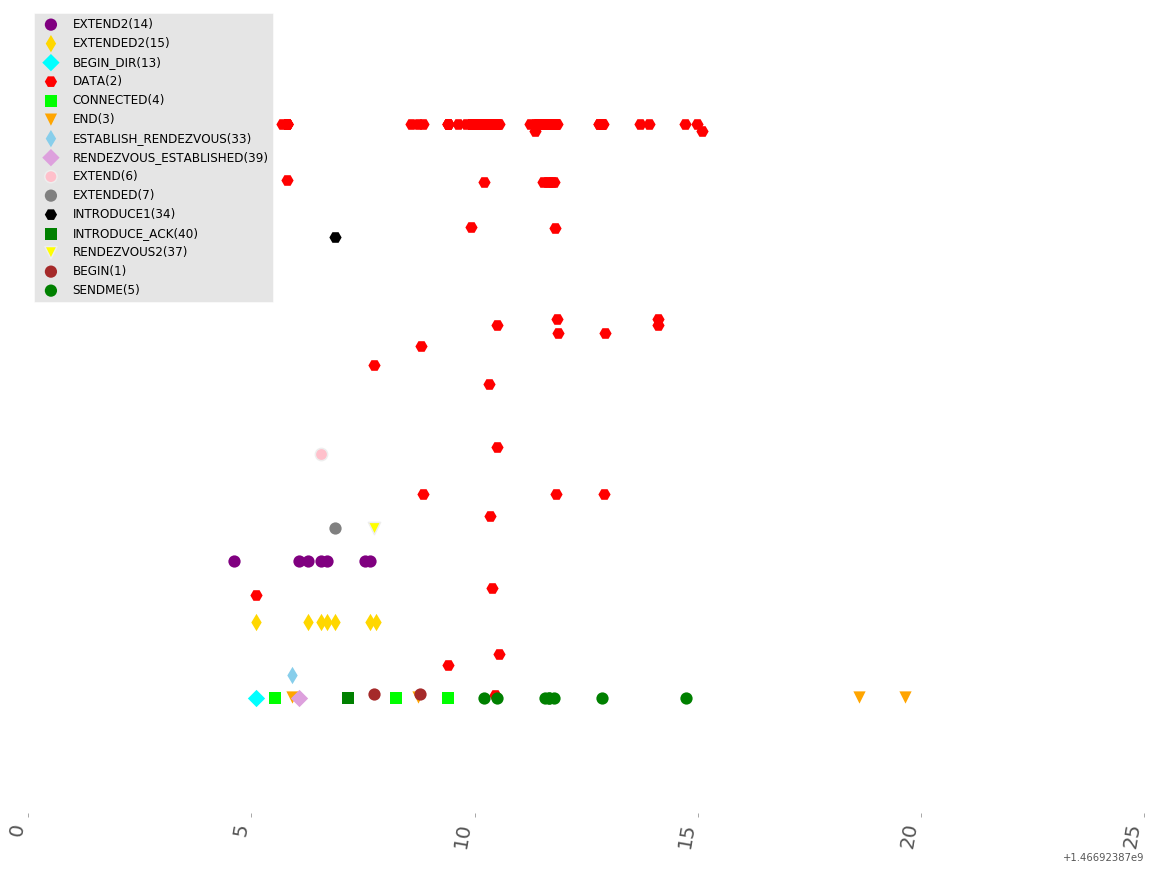

In [292]:
create_timeline_plot(df_00raw, color_dict, shape_dict)